**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [4]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [5]:
def get_best_ranks(ranks, top):
    idx = np.argpartition(ranks, top, axis = 1 )[:,:top]
    return idx
    


def maxnum(y):
    ind = np.unique(y,return_counts = True, return_inverse = True)
    return ind[0][ind[1]][np.argmax(ind[2][ind[1]])]


class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric = 'euclidean'):
        self.metric = metric
        self.n = n_neighbors
        self.algorithm = algorithm
    
    def fit(self, X, y):
        self.y = y
        self.Xtr = (X - np.mean(X, axis  = 0)) / np.std(X, axis = 0)
    
    def predict(self, X):
        self.Xtes = (X - np.mean(X,axis = 0))/np.std(X, axis = 0)
        if self.algorithm == 'brute':
            if self.metric == 'euclidean':
                self.dist = euclidean_distances(self.Xtes,self.Xtr)
            elif self.metric == 'cosine':
                self.dist = cosine_distances(self.Xtes,self.Xtr)
            self.ranks = get_best_ranks(self.dist, self.n)
            self.pair_predict = np.take_along_axis(self.y.reshape(1,-1) + np.zeros(len(self.Xtes)).reshape(-1,1), self.ranks, axis = 1).astype(int)
            return np.apply_along_axis(maxnum, 1, self.pair_predict)
        elif self.algorithm == 'kd_tree':
            self.tree = KDTree(self.Xtr)
            self.dist = self.tree.query(self.Xtes, self.n, return_distance = True)[1]
            self.pair_predict = np.take_along_axis(self.y.reshape(1,-1) + np.zeros(len(self.Xtes)).reshape(-1,1), self.dist, axis = 1).astype(int)
            return np.apply_along_axis(maxnum, 1, self.pair_predict)
        
     


**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [6]:
iris = datasets.load_iris()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
y_train

array([2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 2, 1, 2, 0,
       1, 2, 1, 1, 0, 0, 1, 0, 2, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 2,
       1, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 0,
       1, 1, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0,
       1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 0,
       2, 2, 2, 0, 0, 1, 0, 1, 1, 0, 2, 2, 1, 2, 1, 0, 1, 0, 0, 0, 0, 2,
       1, 0, 1])

In [8]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [9]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [10]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
print(accuracy_score(y_test, my_clf_pred))
print(accuracy_score(y_test, sklearn_pred))
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

1.0
1.0


In [12]:
cpos = 0;
ceq = 0;
for i in range(10000):
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
    clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
    my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')
    clf.fit(X_train, y_train)
    my_clf.fit(X_train, y_train)
    sklearn_pred = clf.predict(X_test)
    my_clf_pred = my_clf.predict(X_test)
    if accuracy_score(y_test, my_clf_pred) >  accuracy_score(y_test, sklearn_pred ):
        cpos += 1
    elif accuracy_score(y_test, my_clf_pred) == accuracy_score(y_test, sklearn_pred ):
        ceq += 1
print ("Successfull tests - " + str(100*(cpos + ceq)/10000) + "%")

Successfull tests - 83.27%


**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [13]:
%time clf.fit(X_train, y_train)

CPU times: user 1.19 ms, sys: 139 µs, total: 1.33 ms
Wall time: 1.4 ms


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [14]:
%time my_clf.fit(X_train, y_train)

CPU times: user 1.14 ms, sys: 730 µs, total: 1.87 ms
Wall time: 1.45 ms


In [15]:
%time clf.predict(X_test)

CPU times: user 4.44 ms, sys: 1.59 ms, total: 6.03 ms
Wall time: 6.02 ms


array([2, 2, 2, 1, 0, 0, 1, 0, 0, 1, 2, 2, 2, 0, 1])

In [16]:
%time my_clf.predict(X_test)

CPU times: user 4.75 ms, sys: 2.04 ms, total: 6.78 ms
Wall time: 7.16 ms


array([2, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 2, 0, 1])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [17]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [19]:
%time clf.fit(X_train, y_train)

CPU times: user 1.74 ms, sys: 1.26 ms, total: 3 ms
Wall time: 6.21 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [20]:
%time my_clf.fit(X_train, y_train)

CPU times: user 774 µs, sys: 454 µs, total: 1.23 ms
Wall time: 965 µs


In [104]:
%time clf.predict(X_test)

CPU times: user 5.04 ms, sys: 11.2 ms, total: 16.3 ms
Wall time: 45.2 ms


array([0, 1, 2, 1, 0, 2, 0, 0, 1, 1, 0, 2, 2, 2, 1])

In [21]:
%time my_clf.predict(X_test)

CPU times: user 4.66 ms, sys: 1 ms, total: 5.66 ms
Wall time: 6.13 ms


array([0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 2, 2, 1, 2, 2])

In [22]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
print(accuracy_score(y_test, my_clf_pred))
print(accuracy_score(y_test, sklearn_pred))
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

1.0
1.0


In [23]:
cpos = 0;
ceq = 0;
for i in range(2000):
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
    clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
    my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
    clf.fit(X_train, y_train)
    my_clf.fit(X_train, y_train)
    sklearn_pred = clf.predict(X_test)
    my_clf_pred = my_clf.predict(X_test)
    if accuracy_score(y_test, my_clf_pred) >  accuracy_score(y_test, sklearn_pred ):
        cpos += 1
    elif accuracy_score(y_test, my_clf_pred) == accuracy_score(y_test, sklearn_pred ):
        ceq += 1
print ("Successfull tests - " + str(100*(cpos + ceq)/2000) + "%")

Successfull tests - 81.9%


**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [126]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [127]:
data = newsgroups['data']
target = newsgroups['target']
target

array([7, 4, 4, ..., 3, 1, 8])

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [110]:
vtext = CountVectorizer(min_df = 0.01, max_df = 0.8)
vmas = vtext.fit_transform(data)
newdat = vmas.toarray()
newdat.shape

(11314, 1379)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [41]:
folds_ind = KFold(n_splits = 3, shuffle = True)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [116]:
#метод
def optimal_neighbors(vectorizer, met, nn_min, nn_max, nn_step):
    if vectorizer == "tfidf":
        vtext = TfidfVectorizer(min_df = 0.01, max_df = 0.8)
    elif vectorizer == "count":
        vtext = CountVectorizer(min_df = 0.01, max_df = 0.8)
    vmas = vtext.fit_transform(data)
    newdat = vmas.toarray()
    folds_ind = KFold(n_splits = 3, shuffle = True)
    results = list()
    for j in range(nn_min,nn_max,nn_step):
        res = list()
        folds_ind = KFold(n_splits = 3, shuffle = True)
        for train_index, test_index in folds_ind.split(target):
            X_train  = newdat[train_index]
            X_test  = newdat[test_index]
            Y_train = target[train_index]
            Y_test  = target[test_index]
            my_clf = MyKNeighborsClassifier(n_neighbors = j, algorithm = 'brute', metric = met )
            my_clf.fit(X_train,Y_train)
            res.append(accuracy_score(my_clf.predict(X_test),Y_test))
        results.append(np.mean(np.asarray(res)))
        res.clear()
        print("#" + str(j))
    print(results)
    res_ar = np.asarray(results)
    fig = plt.figure()
    graph = fig.add_subplot(111)
    print(plt.plot(range(nn_min, nn_max, nn_step), results))
    return "Optimal number = " + str((np.argmax(res_ar)+1)*nn_step)
    
    

#10
#20
#30
#40
#50
#60
#70
#80
#90
#100
#110
#120
#130
#140
#150
#160
#170
#180
#190
#200
[0.1957760003389526, 0.19391930697695825, 0.1788929326981347, 0.1733240008890006, 0.16828735398488157, 0.15388041648048176, 0.15361584412080848, 0.14247741808122658, 0.14468745263358, 0.14247819141053297, 0.13487683301308126, 0.13646961017360168, 0.13213666950408218, 0.12771732686023896, 0.12824637784269996, 0.12568468936392868, 0.12427015289142203, 0.11790635572641915, 0.12038093920422445, 0.1145483724042733]


'Optimal number = 1'

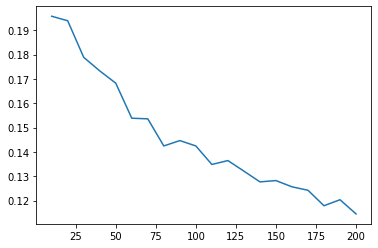

In [39]:
#вычисление оптимального количества соседей, построение графика для модели с использованием
#евклидовой метрики и Countvectorizer
optimal_neighbors("count", "euclidean",10, 210, 10)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

#10
#20
#30
#40
#50
#60
#70
#80
#90
#100
#110
#120
#130
#140
#150
#160
#170
#180
#190
#200
[0.3055506812375031, 0.3250832922531432, 0.33277400533681584, 0.3351598434181568, 0.33392167289595137, 0.3361330900673678, 0.3369272758308158, 0.33675037089342225, 0.3449711894995191, 0.34028523571874025, 0.34302722709700895, 0.33843025305490854, 0.3417007329943245, 0.33621935143636317, 0.3363075812799566, 0.3338334664865794, 0.3329494104840394, 0.335779420797909, 0.33056390048179823, 0.33021166069984526]


'Optimal number = 90'

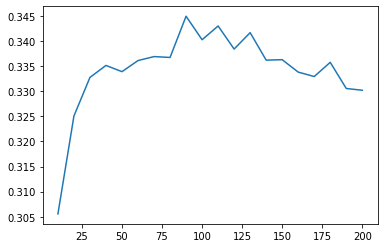

In [117]:
# metric == cosine + countvectorizer
optimal_neighbors("count", "cosine",10, 210, 10)


#10
#20
#30
#40
#50
#60
#70
#80
#90
#100
#110
#120
#130
#140
#150
#160
#170
#180
#190
#200
[0.08909318374426178, 0.07910556544948383, 0.07618852043731257, 0.068056962780551, 0.06717325829133218, 0.06284219235952519, 0.06522833508574441, 0.059483646616065616, 0.05895356452786277, 0.060897409759265865, 0.05842343557121712, 0.058953845738519646, 0.060633142044470845, 0.056920317741795935, 0.05409211186297467, 0.05577190028757539, 0.05559459696841789, 0.05577220493245367, 0.05550646086171007, 0.05630205267844245]


'Optimal number = 10'

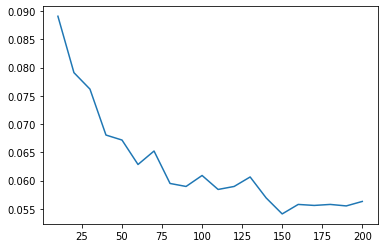

In [120]:
# metric == euclidic + Tfidf
optimal_neighbors("tfidf", "euclidean",10, 210, 10)

#10
#20
#30
#40
#50
#60
#70
#80
#90
#100
#110
#120
#130
#140
#150
#160
#170
#180
#190
#200
[0.3868656953838052, 0.42761206502452764, 0.44449386721738965, 0.45571855462596683, 0.4651757861876637, 0.475075455849505, 0.48073160983071217, 0.480997541375227, 0.4885986419962432, 0.49186776275081767, 0.49151425752090877, 0.492397469891478, 0.49443092758553747, 0.496287456907982, 0.5002649941756586, 0.497701266919625, 0.5046835634901954, 0.5030046655660082, 0.504684407122166, 0.5045084629878501]


'Optimal number = 190'

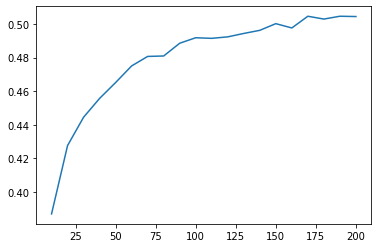

In [119]:
#Tfidf + metric == cosine
optimal_neighbors("tfidf", "cosine",10, 210, 10)

### Самым производительным оказался метод, использующий косинусную метрику и Tfidf в количестве соседей, равном 190. Его и используем далее.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [24]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [25]:
data_test = newsgroups['data']
target_test = newsgroups['target']
vtext = TfidfVectorizer(min_df = 0.01, max_df = 0.8)
vmas = vtext.fit_transform(data_test)
newdat_test = vmas.toarray()
res = list()
folds_ind = KFold(n_splits = 3, shuffle = True)
for train_index, test_index in folds_ind.split(target_test):
    X_train  = newdat_test[train_index]
    X_test  = newdat_test[test_index]
    Y_train = target_test[train_index]
    Y_test  = target_test[test_index]
    my_clf = MyKNeighborsClassifier(n_neighbors = 190, algorithm = 'brute', metric = "cosine" )
    my_clf.fit(X_train,Y_train)
    res.append(accuracy_score(my_clf.predict(X_test),Y_test))
print(np.asarray(res))
print("Mean for accuracy = " + str(np.mean(np.asarray(res))))

[0.47112704 0.46555157 0.49601594]
Mean for accuracy = 0.4775648501176497


### Как видно из полученного, средний скор отличается от среднего скора на выборке train приблизительно на 0.03. Подобное изменение может быть связано с изменением непосредственно словаря, получаемого в ходе разбиения текстов, с изменением частоты появления в текстах тех или иных слов из словаря, полученного из train - набора, а также с изменением содержательности самих текстов.